In [18]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
matplotlib.rc("font",family = "Malgun Gothic") # 맑은고딕 적용
matplotlib.rc("axes",unicode_minus = False) # 음수표시

In [3]:
df_raw = pd.read_csv("../data/HMEQ.CSV")
df_raw

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,DebtCon,Other,16.0,0,0.0,221.808718,0.0,16,36.112347
3744,0,89000,54576,92937.0,DebtCon,Other,16.0,0,0.0,208.692070,0.0,15,35.859971
3745,0,89200,54045,92924.0,DebtCon,Other,15.0,0,0.0,212.279697,0.0,15,35.556590
3746,0,89800,50370,91861.0,DebtCon,Other,14.0,0,0.0,213.892709,0.0,16,34.340882


In [4]:
df_raw["JOB"].fillna("Other",inplace = True)
df_raw.fillna(df_raw.mean(),inplace = True)

C:\Users\khm51\AppData\Local\Temp\ipykernel_6644\4235343763.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(),inplace = True)


In [5]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,16.0,0,0.0,221.808718,0.0,16,36.112347,1,0,0,0,1,0,0,0
3744,0,89000,54576,92937.0,16.0,0,0.0,208.692070,0.0,15,35.859971,1,0,0,0,1,0,0,0
3745,0,89200,54045,92924.0,15.0,0,0.0,212.279697,0.0,15,35.556590,1,0,0,0,1,0,0,0
3746,0,89800,50370,91861.0,14.0,0,0.0,213.892709,0.0,16,34.340882,1,0,0,0,1,0,0,0


In [6]:
df_raw_x = df_raw_dummy.drop("BAD",axis = 1, inplace = False)
df_raw_y = df_raw_dummy["BAD"]

df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 0.3, random_state = 1234)
print("분할 전 설명변수 데이터 :",df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train",df_train_x.shape," Test",df_test_x.shape)

분할 전 설명변수 데이터 : (3748, 18)
분할 후 설명변수 데이터 : Train (2623, 18)  Test (1125, 18)


In [7]:
knn_uncusotomized = KNeighborsClassifier()
knn_uncusotomized.fit(df_train_x,df_train_y)
print("Accuracy on training set : {:.3f}".format(knn_uncusotomized.score(df_train_x,df_train_y)))
print("Accuracy on test set : {:.3f}".format(knn_uncusotomized.score(df_test_x,df_test_y)))

Accuracy on training set : 0.916
Accuracy on test set : 0.908


In [13]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy
df_accuracy_neighbors['TestAccuracy'] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.877
1,2,0.928,0.912
2,3,0.929,0.913
3,4,0.916,0.914
4,5,0.916,0.908
5,6,0.913,0.911
6,7,0.913,0.912
7,8,0.910,0.912
8,9,0.911,0.913
9,10,0.909,0.910


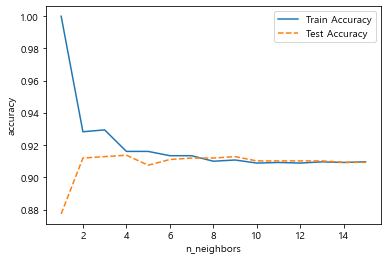

In [14]:
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle="--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")

plt.legend()

In [16]:
train_accuracy = []
test_accuracy = []

para_n_neighbors = [i for i in range(1,11)] *2
#가중치
para_weights = (['uniform'])*10+(['distance']*10)

for (v_n_neighbors,v_weights) in zip(para_n_neighbors,para_weights):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors,weights=v_weights)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
    
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors']=para_n_neighbors
df_accuracy_weights['Weights']=para_weights
df_accuracy_weights['TrainAccuracy']=train_accuracy
df_accuracy_weights['TestAccuracy']=test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.877
1,2,uniform,0.928,0.912
2,3,uniform,0.929,0.913
3,4,uniform,0.916,0.914
4,5,uniform,0.916,0.908
5,6,uniform,0.913,0.911
6,7,uniform,0.913,0.912
7,8,uniform,0.910,0.912
8,9,uniform,0.911,0.913
9,10,uniform,0.909,0.910


In [20]:
df_accuracy_weights_pivot=df_accuracy_weights.pivot(index="Neighbors",columns="Weights",
                                                    values=['TrainAccuracy','TestAccuracy'])

df_accuracy_weights_pivot


level0=df_accuracy_weights_pivot.columns.get_level_values(0)
level1=df_accuracy_weights_pivot.columns.get_level_values(1)

df_accuracy_weights_pivot.columns=level0+"_"+level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.877333,0.877333
2,1.0,0.928326,0.877333,0.912000
3,1.0,0.929470,0.912000,0.912889
4,1.0,0.916127,0.913778,0.913778
5,1.0,0.916127,0.912889,0.907556


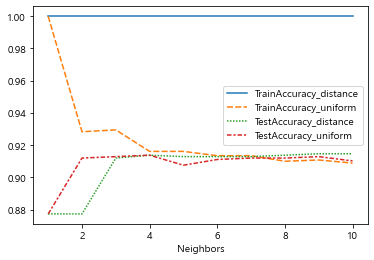

In [21]:
sns.lineplot(data=df_accuracy_weights_pivot)

weights="uniform"

In [22]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1,11)] *3
para_metric = ["minkowski"] *10 + ["euclidean"]*10 + ["manhattan"] * 10

for(v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric=v_metric, weights = "uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.877
1,2,minkowski,0.928,0.912
2,3,minkowski,0.929,0.913
3,4,minkowski,0.916,0.914
4,5,minkowski,0.916,0.908
5,6,minkowski,0.913,0.911
6,7,minkowski,0.913,0.912
7,8,minkowski,0.910,0.912
8,9,minkowski,0.911,0.913
9,10,minkowski,0.909,0.910


<AxesSubplot:xlabel='Neighbors'>

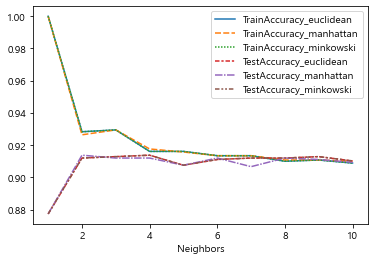

In [24]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns="Metric",
values = ["TrainAccuracy", "TestAccuracy"])
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data=df_accuracy_metric_pivot)

In [27]:
knn_model = KNeighborsClassifier(n_neighbors = 4, weights = 'uniform',metric = 'euclidean')
knn_model.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)

print('train data accuracy : {0:.3f}'.format(knn_model.score(df_train_x, df_train_y)))

print('test data accuracy : {0:.3f}'.format(knn_model.score(df_test_x, df_test_y)))

print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y,y_pred)))

print(classification_report(df_test_y, y_pred,  digits = 3))

train data accuracy : 0.916
test data accuracy : 0.914
Confusion matrix : 
[[1018    3]
 [  94   10]]
              precision    recall  f1-score   support

           0      0.915     0.997     0.955      1021
           1      0.769     0.096     0.171       104

    accuracy                          0.914      1125
   macro avg      0.842     0.547     0.563      1125
weighted avg      0.902     0.914     0.882      1125

